# Proyecto Data Science I: Parte II

## *ABSTRACT*



## 1. Introducción <a class="anchor" id="introduccion"></a>

En el presente documento se desarrollará un modelo de predicción del resultado en términos de medallas de los competidores de los juegos olímpicos. Para ésto se analizará una fuente de datos que contiene información sobre los juegos olimpicos modernos, abarcando desde el año 1896 al 2016. En ella existe información sobre los deportistas participantes (nombre, sexo, peso y estatura), los eventos, los comités participantes, el país anfitrión de los respectivos juegos y los resultados en términos de medallas.

La motivación de este proyecto corresponde a explicar que factores predicen de mejor manera el éxito deportivo en los juegos olímpicos, información que será de gran relevancia para los diversos comités olímpicos participantes.

La audiencia de este proyecto abarcaría desde los comités olímpicos antes mencionados, secretarias de deporte del estado o gobernaciones regionales/provinciales, fans de los juegos olímpicos en general.


### 1.1. Hipótesis Iniciales <a class="anchor" id="hipotesis"></a>

Se consideran las siguientes hipótesis iniciales:

* De acuerdo con las variables provistas en el dataset es posible desarrollar un modelo supervisado de clasificación de categorías que prediga el resultado de medalla olímpica (Oro, Plata Bronce o Sin Medalla).

* Se presume que la variable con mayor correlación será el país de origen del competidor.

* Se presume que la variable con menor correlación será el nombre del país anfitrión.

### 1.2. Objetivos <a class="anchor" id="objetivos"></a>

El objetivo principal de este proyecto será desarrollar y validar un modelo de machine learning que sea capaz de predecir, basado en ciertos parámetros de entrada, el resultado de medalla olímpica de un participante.

Para cumplir con este objetivo se propone realizar un modelo de **aprendizaje supervisado** de clasificación, donde las etiquetas para la categoría Medal serán *Gold*, *Silver*, *Bronce* y *No Medal*

Se consideran los siguientes algoritmos para realizar el modelo:

* K-nearest neighbors (KNN)
* Random Forest

### 1.3. Contexto comercial <a class="anchor" id="contexto"></a>

Se espera que un modelo de las características del desarrollado en este trabajo sea de utilidad para los comités olímpicos, ya que puede permitir establecer mecanismos de selección de deportistas basados en las categorías consideradas. Por otro lado, también será posible realizar predicciones sobre nuevos juegos olímpicos basados en los nuevos participantes, que servirían a todo tipo de casas de apuestas, por ejemplo.

### 1.4. Consideraciones  <a class="anchor" id="consideraciones"></a>

El presente dataset contiene información sobre actividades que no serán contempladas en las siguientes secciones:

* *Art Competitions*: Fue una categoría incluida en los juegos olimpicos de verano entre 1912 y 1948 que incluyen competencias en arquitectura, literatura, musica, pintura y escultura. Esta categoría no será considerada por no ser una actividad deportiva de desempeño físico.

* *Winter Olympics*: El dataset incluye información sobre los juegos olimpicos de invierno. Esta información no es de interés para éste trabajo.

### 1.5. Fuente <a class="anchor" id="fuente"></a>

El dataset utilizado se puede encontrar en:

https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results


## 2. Descripción del Dataset <a class="anchor" id="descripcion-dataset"></a>

Este es un dataset historico con informacion sobre los juegos olimpicos de la era moderna, abarcando desde los juegos de Atenas 1896 hasta Rio 2016.

Las columnas que componen el dataset se describen a continuación

* ID - Numero único para cada atleta
* Name - Nombre del atleta
* Sex - Sexo masculino o femenino (M o F)
* Age - Edad como numero entero
* Height - Altura en centimetros
* Weight - Peso en kilogramos
* Team - Nombre del equipo
* NOC - Comité Olimpico Nacional (Codigo de 3 letras)
* Games - Año y temporada
* Year - Año de los juegos olimpicos
* Season - Temporada (verano o invierno)
* City - Ciudad anfitriona
* Sport - Deporte. Se debe tomar en cuenta que existieron las *"Art Competitions"* que no serán contempladas en el presente análisis.
* Event - Evento
* Medal - Medalla obtenida (Oro, plata, bronce o NA)

## 3. Preparación inicial <a class="anchor" id="preparacion-inicial"></a>

In [1]:
# Cargar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Se ignoran alertas para mejorar aspecto del notebook
import warnings
warnings.filterwarnings("ignore")

# Definir el estilo de los gráficos de matplotlib
mpl.style.use("bmh")

In [2]:
# Cargar datos
df = pd.read_csv(filepath_or_buffer="./datasets/athlete_events.csv")

In [3]:
# Se eliminan del análisis los datos del deporte "Art Competitions"
df = df[df["Sport"]!="Art Competitions"]

# Se eliminan del análisis los datos de la temporada de invierno
df = df[df["Season"]!="Winter"]

In [4]:
# Se ordenan los datos por ID y Year
df.sort_values(by=["ID", "Year"], inplace=True)

In [5]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


## 4. Descripción de los datos <a class="anchor" id="descripcion-datos"></a>

### 4.1. Información de los datos <a class="anchor" id="info-datos"></a>

La información de los datos muestra que tenemos un total de 218974 entradas, según la columna ID. Se observa que las siguientes columnas tienen entradas nulas:

* Age
* Height
* Weight
* Medal

En el caso de las columnas Age, Height y Weight, se presume que los datos faltantes no fueron encuestados, ingresados a la base de datos o se perdió la información. En el caso de la columna Medal, es esperable que existan muchos datos nulos, pues solo algunos competidores obtienen medallas olímpicas.

In [6]:
# Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218974 entries, 0 to 271110
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      218974 non-null  int64  
 1   Name    218974 non-null  object 
 2   Sex     218974 non-null  object 
 3   Age     210292 non-null  float64
 4   Height  170636 non-null  float64
 5   Weight  168643 non-null  float64
 6   Team    218974 non-null  object 
 7   NOC     218974 non-null  object 
 8   Games   218974 non-null  object 
 9   Year    218974 non-null  int64  
 10  Season  218974 non-null  object 
 11  City    218974 non-null  object 
 12  Sport   218974 non-null  object 
 13  Event   218974 non-null  object 
 14  Medal   33932 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 26.7+ MB


### 4.2. Describe - Variables Numéricas<a class="anchor" id="describe-numericas"></a>

Se utiliza el metodo `describe()` para obtener los parámetros estadísticos mas relevantes de las variables numéricas del dataset. Las variables numéricas son:

* ID : Se identifica un total de 218974 entradas. Esta columna no tiene otra relevancia estadísticas, mas que para identificar las entradas.
* Age : Se observa un rango de edades de entre 10 y 72 años, con un promedio de 25.3 años y una desviación estándar de +/-6.0 años.
* Height : Se observa un rango de estaturas de entre 127 y 226 cm, con un promedio de 175.5 cm y una desviación estándar de +/-10.9 cm.
* Weight : Se observa un rango de pesos de entre 25 y 214 kg, con un promedio de 70.6 kg y una desviación estándar de +/-14.8 kg.
* Year : Se observa que los años considerados se encuentran entre 1896 y 2016.

In [7]:
# Descripción de variables numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,218974.0,68023.420959,39150.001900,1.0,34017.0,68380.5,101909.0,135568.0
Age,210292.0,25.378669,6.092646,10.0,21.0,24.0,28.0,72.0
Height,170636.0,175.515852,10.915257,127.0,168.0,175.0,183.0,226.0
Weight,168643.0,70.687559,14.805520,25.0,60.0,70.0,79.0,214.0
Year,218974.0,1977.021957,30.682110,1896.0,1960.0,1984.0,2000.0,2016.0


### 4.3. Describe - Variables No Numéricas  <a class="anchor" id="describe-no-numericas"></a>

Se utiliza el metodo `describe(exclude="number")` para obtener los parámetros estadísticos mas relevantes de las variables no-numéricas del dataset. Las variables no-numéricas son:

* Name :Se observa que de 218974 entradas hay 114344 únicas.
* Sex : Se observa que la mayor cantidad de participantes han sido Masculinos, con 159908 entradas.
* Team : El equipo con mayor cantidad de participanes es Estados Unidos, con 13964 participantes.
* NOC : La comisión con mayor cantidad de participantes es USA, con 14502 participaciones.
* Games : Los juegos con mayor cantidad de participantes fueron los juegos olimpicos de verano de 2000, con 13821 participantes.
* Season : Solo existe una entrada unica que es 'Summer'. De esta forma, esta columna resulta irrelevanta para futuros análisis.
* City : La mayor cantidad de participantes han participado en juegos realizados en Londres, con 21955 participantes.
* Sport : El deporte con la mayor cantidad de participantes ha sido el Atletismo, con 38624 participantes.
* Event : El evento con mayor cantidad de participantes ha sido el Futbol Masculino, con 5733 participantes.
* Medal : La mayor cantidad de medallas han sido de oro, con 11410 participantes llevandose dicha medalla.

In [8]:
# Descripción de variables categóricas
df.describe(exclude="number").T

,count,unique,top,freq
Name,218974,114344,Heikki Ilmari Savolainen,39
Sex,218974,2,M,159908
Team,218974,1156,United States,13964
NOC,218974,229,USA,14502
Games,218974,29,2000 Summer,13821
Season,218974,1,Summer,218974
City,218974,23,London,21955
Sport,218974,51,Athletics,38624
Event,218974,622,Football Men's Football,5733
Medal,33932,3,Gold,11410


## 5. Limpieza y Transformación de datos

### 5.1. Valores duplicados

La primera etapa será eliminar los valores duplicados del dataset.

In [9]:
# Verificar el numero de valores duplicados en general
df.duplicated().sum()

70

En general, se encontraron 70 entradas repetidas. Se utiliza el metodo `drop_duplicates()` para eliminar las entradas duplicadas.

In [10]:
# Se eliminan duplicados
df.drop_duplicates(inplace=True)

# Se comprueba el numero de duplicados
df.duplicated().sum()

0

### 5.2. Caracteristicas adicionales

#### Columna: *Previous_participations*

Se considera que las *participaciones previas* puede ser una característica que influencie el desempeño en los juegos, debido a la experiencia. Se agrega la columna *Previous_participations*.

In [11]:
df["Previous_participations"] = df.groupby("ID").cumcount()

#### Columnas: *Previous_Gold*, *Previous_Silver*, *Previous_Bronze*

Se considera que el éxito previo en terminos de medallas puede influenciar el resultado de la instancia estudiada. Se crean entonces las columnas *Previous_Gold*, *Previous_Silver*, *Previous_Bronze* como se muestra a continuación.

In [12]:
df["Previous_Gold"] = df[df.Medal == "Gold"].groupby("ID").cumcount()
df["Previous_Silver"] = df[df.Medal == "Silver"].groupby("ID").cumcount()
df["Previous_Bronze"] = df[df.Medal == "Bronze"].groupby("ID").cumcount()

# Se rellenan los valores nulos con 0
df[["Previous_Gold", "Previous_Silver", "Previous_Bronze"]] = df[["Previous_Gold", "Previous_Silver", "Previous_Bronze"]].fillna(0)

In [13]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Previous_participations,Previous_Gold,Previous_Silver,Previous_Bronze
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0,0.0,0.0,0.0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0,0.0,0.0,0.0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,0,0.0,0.0,0.0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,0.0,0.0,0.0
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,0,0.0,0.0,0.0


### 5.1. Columnas redundantes

Existe un conjunto de columnas redundantes, o bien porque son una composición de otras columnas o porque no aportarán información al modelo estadístico.

#### Columna: ID (NO ESTOY SEGURO)

Esta columna no tiene relación con el resultado obtenido, por lo tanto se elimina.

In [14]:
# df.drop(columns="ID", inplace=True)

#### Columna: Name

Se considerará como identificador del atleta su ID, por lo tanto, la columna *Name* es redundante y se elimina utilizando el metodo `drop()`.

In [15]:
df.drop(columns="Name", inplace=True)

#### Columnas: Season y Summer Games

La única temporada considerada en el análisis es *Summer*, por lo que esta columna es redundante. Por otro lado, la columna *Games* es una combinación de las columnas *Year* y *Season*. Por lo tanto, toda la información necesaria ya está contenida en la columna *Year*. De esta forma, las columnas *Season* y *Games* se eliminan del dataset.

In [16]:
df.drop(columns=["Season", "Games"], inplace=True)

#### Columnas: Event y NOC

Estas columnas podrían parecer redundantes. Sin embargo, para cada deporte existen diversas categorías y en algunos paises hay más de un comité olímpico. Es por esta razón, que dichas columnas se mantendrán.

### 5.2. Valores nulos

Al contar los valores nulos del dataset se encuentra que las columnas *Age*, *Height*, *Weight* y *Medal* son las únicas con valores nulos.

In [17]:
# Verificar cantidad de valores nulos por cada columna
df.isnull().sum()

ID                              0
Sex                             0
Age                          8650
Height                      48269
Weight                      50262
Team                            0
NOC                             0
Year                            0
City                            0
Sport                           0
Event                           0
Medal                      184983
Previous_participations         0
Previous_Gold                   0
Previous_Silver                 0
Previous_Bronze                 0
dtype: int64

#### Columna: Medal

En este caso, se imputará el valor 'No Medal' para los valores nulos, usando como supuesto que las entradas nulas equivalen a no haber obtenido ninguna medalla. Además, se agregará una nueva columna llamada *Previous_No_Medal* como complemento a este valor imputado.

In [18]:
# Imputar valor No Medal
df["Medal"] = df["Medal"].fillna(value="No Medal")

In [19]:
# Se agrega columna Previous_No_Medal
df["Previous_No_Medal"] = df[df.Medal == "No Medal"].groupby("ID").cumcount()

# Se rellenan los valores nulos con 0
df["Previous_No_Medal"] = df["Previous_No_Medal"].fillna(0)

#### Columnas: Age, Height y Weight

Tenemos una alta cantidad de valores nulos en estas 3 variables. En primer lugar, se analizará la evolución de los datos nulos en el tiempo, realizando graficos de evolución temporal de la cantidad de valores nulos por año.
Se puede observar que previo al año 1960 se tienen una alta cantidad de valores nulos, siendo superior al 80% del total de datos el año 1900 y cercano al 20% en 1956. De esta forma, como uno de los requisitos para desarrollar un buen modelo de prediccion es tener una gran cantidad de valores en todas las variables, sólo se consideraran las entradas para años posteriores a 1960.

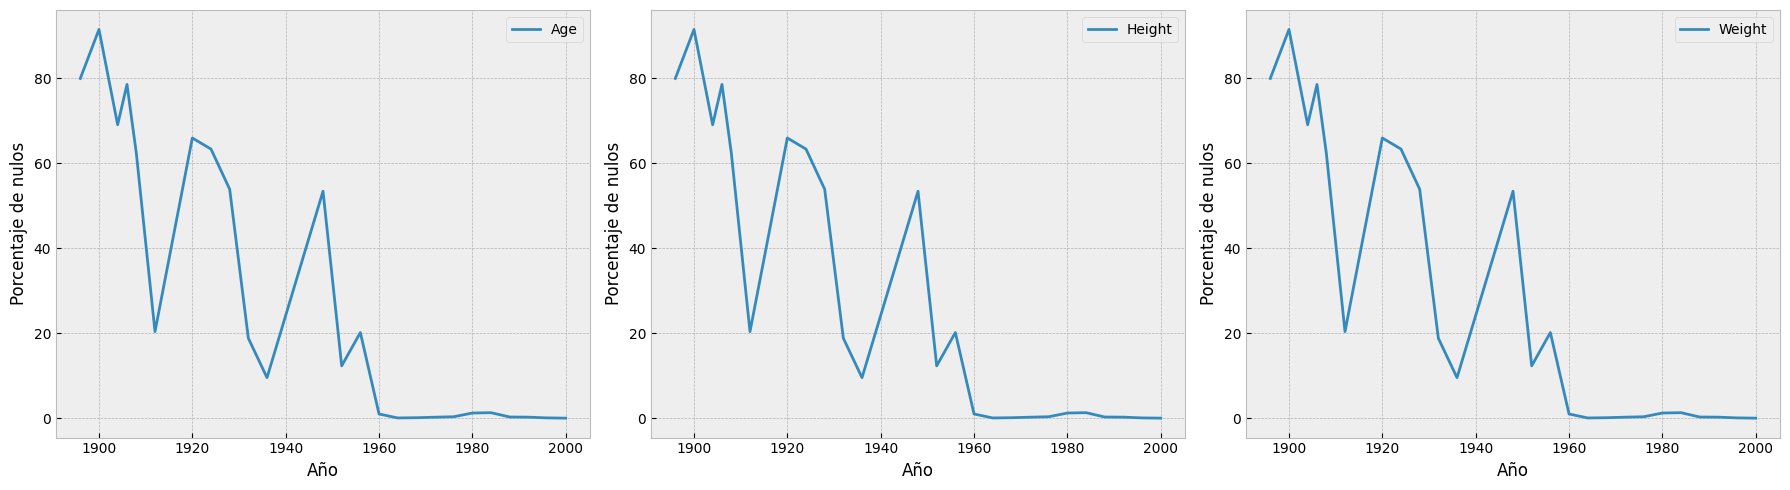

In [20]:
# Filtramos los valores nulos para Age, Height y Weight
null_values = df[(df["Age"].isna())
                 & (df["Height"].isna())
                 & (df["Weight"].isna())][["Year", "Age", "Height", "Weight"]]

null_values = null_values.fillna(1)

# Contamos los valores nulos por año
count_nulls = null_values.groupby(["Year"]).count()

# Filtramos los valores no nulos para Age, Height y Weight
not_null_values = df[(~df["Age"].isna())
                     & (~df["Height"].isna())
                     & (~df["Weight"].isna())][["Year", "Age", "Height", "Weight"]]

count_not_nulls = not_null_values.groupby(["Year"]).count()

null_ratios = count_nulls/(count_nulls+count_not_nulls)

# # Graficamos los resultados
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for i, ax in enumerate(axs):
    ax.plot(null_ratios.index,
            null_ratios.iloc[:, i]*100, 
            label=null_ratios.columns[i])
    ax.set_xlabel("Año")
    ax.set_ylabel("Porcentaje de nulos")
    ax.legend()

plt.tight_layout()

In [21]:
# Se filtran los datos para años posteriores a 1960
df = df[df["Year"]>=1960]

#### Imputación de los datos nulos. Columnas: *Age*, *Height* y *Weight*

Luego de la eliminación de los datos previos a 1960, se imputarán los datos nulos restantes de las columnas *Age*, *Height* y *Weight*, utilizando la mediana de los datos de la siguiente manera:

* Es de sentido común que el peso de los deportistas es altamente variable dependiendo del deporte que practican (por ejemplo, la diferencia entre un levantador de pesas promedio y un maratonista promedio) y también es esperable que exista una diferencia significativa de los pesos y estaturas entre hombres y mujeres, en todas las categorías.
* Por lo tanto, se aplicará la imputación de los datos nulos utilizando la mediana de los datos agrupados por Sexo y Deporte.



In [22]:
# Se imputan los datos agrupados por sexo y deporte, reemplazando valores nulos por la media de cada grupo
df["Age"] = df.groupby(["Sex", "Sport"])["Age"].transform(lambda x: x.fillna(x.median()))
df["Height"] = df.groupby(["Sex", "Sport"])["Height"].transform(lambda x: x.fillna(x.median()))
df["Weight"] = df.groupby(["Sex", "Sport"])["Weight"].transform(lambda x: x.fillna(x.median()))

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,166267.0,68010.074934,39183.543922,1.0,34073.5,68396.0,101720.0,135568.0
Age,166267.0,24.970048,5.664774,11.0,21.0,24.0,28.0,71.0
Height,166267.0,175.538688,10.933924,127.0,168.0,175.0,183.0,226.0
Weight,166267.0,70.614698,14.741817,25.0,60.0,70.0,79.0,214.0
Year,166267.0,1991.371878,16.808672,1960.0,1976.0,1992.0,2004.0,2016.0
Previous_participations,166267.0,1.346196,2.503571,0.0,0.0,0.0,2.0,37.0
Previous_Gold,166267.0,0.017911,0.244564,0.0,0.0,0.0,0.0,22.0
Previous_Silver,166267.0,0.007446,0.109258,0.0,0.0,0.0,0.0,5.0
Previous_Bronze,166267.0,0.006020,0.091663,0.0,0.0,0.0,0.0,5.0
Previous_No_Medal,166267.0,1.053847,2.232136,0.0,0.0,0.0,1.0,37.0


#### Reset index

Finalmente, se deben resetear los indices del Dataframe utilizando el método `reset_index()`.

In [23]:
df.reset_index(inplace=True, drop=True)

### 5.3. Label Encoding

Se reemplazan los valores categóricos por valores numéricos que puedan ser incluidos en el modelo de machine learning. Como el número de categorías en varias columnas es muy grande, es conveniente utilizar la clase `LabelEncoder()` del paquete `sklearn`.

In [24]:
# Dataframe previo a la aplicación de los LabelEncoders
df.head()

,ID,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,Previous_participations,Previous_Gold,Previous_Silver,Previous_Bronze,Previous_No_Medal
0,1,M,24.0,180.0,80.0,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No Medal,0,0.0,0.0,0.0,0.0
1,2,M,23.0,170.0,60.0,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No Medal,0,0.0,0.0,0.0,0.0
2,12,M,31.0,172.0,70.0,Finland,FIN,2000,Sydney,Badminton,Badminton Men's Singles,No Medal,0,0.0,0.0,0.0,0.0
3,13,F,30.0,159.0,55.5,Finland,FIN,1996,Atlanta,Sailing,Sailing Women's Windsurfer,No Medal,0,0.0,0.0,0.0,0.0
4,13,F,34.0,159.0,55.5,Finland,FIN,2000,Sydney,Sailing,Sailing Women's Windsurfer,No Medal,1,0.0,0.0,0.0,1.0


In [25]:
from sklearn.preprocessing import LabelEncoder

# Se crea una copia del dataframe para no perder información
df_n = df.copy(deep=True)

# Se crean los LabelEncoders para todas las columnas categóricas
le_sex = LabelEncoder()
df_n["Sex"] = le_sex.fit_transform(df["Sex"])

le_team = LabelEncoder()
df_n["Team"] = le_team.fit_transform(df["Team"])

le_noc = LabelEncoder()
df_n["NOC"] = le_noc.fit_transform(df["NOC"])

le_city = LabelEncoder()
df_n["City"] = le_city.fit_transform(df["City"])

le_sport = LabelEncoder()
df_n["Sport"] = le_sport.fit_transform(df["Sport"])

le_event = LabelEncoder()
df_n["Event"] = le_event.fit_transform(df["Event"])

le_medal = LabelEncoder()
df_n["Medal"] = le_medal.fit_transform(df["Medal"])

# Se almacenan los LabelEncoders en un diccionario para posterior uso.
# Se utilizan convenientemente como 'keys' los mismos nombres de las columnas
# del Dataframe
label_encoders = {
    "Sex": le_sex,
    "Team": le_team,
    "NOC": le_noc,
    "City": le_city,
    "Sport": le_sport,
    "Event": le_event,
    "Medal": le_medal,
}

# Dataframe resultante
df_n.head()

,ID,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,Previous_participations,Previous_Gold,Previous_Silver,Previous_Bronze,Previous_No_Medal
0,1,1,24.0,180.0,80.0,99,39,1992,2,4,61,2,0,0.0,0.0,0.0,0.0
1,2,1,23.0,170.0,60.0,99,39,2012,4,17,178,2,0,0.0,0.0,0.0,0.0
2,12,1,31.0,172.0,70.0,166,65,2000,13,2,56,2,0,0.0,0.0,0.0,0.0
3,13,0,30.0,159.0,55.5,166,65,1996,1,22,238,2,0,0.0,0.0,0.0,0.0
4,13,0,34.0,159.0,55.5,166,65,2000,13,22,238,2,1,0.0,0.0,0.0,1.0


### 5.4. Detección de outliers

Las columnas sobre las que se pueden analizar outliers son *Age*, *Height* y *Weight*. Es necesario poner énfasis en el hecho de que no es posible analizar los outliers de forma univariada, esto debido al hecho de que la distribución de los datos es altamente dependiente del tipo de deporte y el sexo. Como ejemplo, se muestra la comparación de las estaturas de las categorías deportivas de *Basketball* y *Athletics*, a través de un histograma de densidad, que muestra claramente la diferencia entre ambos grupos.

Por lo tanto, lo que se realizará es una detección multivariada de outliers, utilizando como método el cálculo del Z-score calculando la distancia euclideana en varias dimensiones. Las dimensiones que se incluyen en el análisis serán:

* *Age*, *Weight* y *Height*
* *Sex*
* *Sport*

#### Ejemplo de distribución de Estaturas: Basketball vs Athletics

Text(0.5, 1.0, 'Comparación distribución de Estaturas \n Basketball vs Athletics')

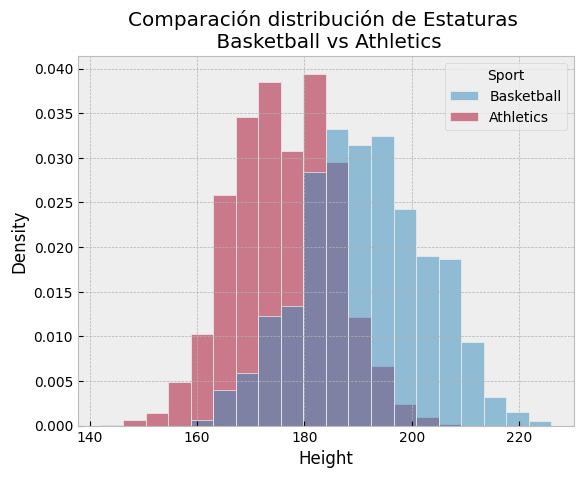

In [26]:
# Se crea un dataframe para comparar la distribución de los pesos para dos categorías deportivas
df_comparison = df[(df["Sport"] == "Basketball")
                   | (df["Sport"] == "Athletics")]

# Se grafica histograma para comparar estaturas
ax = sns.histplot(data=df_comparison, x="Height", hue="Sport",
             bins=20, stat="density", common_norm=False)
ax.set_title("Comparación distribución de Estaturas \n Basketball vs Athletics")

#### Cálculo de Outliers Multivariados

In [27]:
# Se define la función para calcular los outliers multivariados
def outlier_euclideano_d(df: pd.DataFrame, cutoff: float):
    """Mide la distancia euclideana entre al vector de la media de todas las variables de df,
    calcula el Z score de la distancia respecto a la media para cada instancia. Luego devuelve
    un vector de resultados de cuales instancias son outliers basado en este criterio."""
    # df: dataframe con valores numericos normalizados
    result_ = pd.Series([0] * len(df.iloc[:, 1])) # se genera una Serie con ceros con largo igual al largo de las columnas
    data_mean = df.mean()  # media de los datos_ 
    # Distancia euclideana
    dist = np.sqrt(np.sum(((df-data_mean) ** 2), axis=1))
    dist_mean = dist.mean()  # media de las distancia
    dist_zscore = np.abs((dist - dist_mean) / dist.std())  # z-score para las distancias
    result_[((dist_zscore > cutoff))] = 1
    return result_

In [28]:
# Se calcula una versión normalizada de los datos
from sklearn.preprocessing import MinMaxScaler

# Se realiza una copia de los datos para normalizar
df_norm = df_n[["Sex", "Age", "Weight", "Height", "Sport", "Previous_participations",
                "Previous_Gold", "Previous_Silver", "Previous_Bronze"]] \
                .copy(deep=True)

df_norm[["Sex", "Age", "Weight", "Height", "Sport"]] = MinMaxScaler() \
    .fit_transform(df_norm[["Sex", "Age", "Weight", "Height", "Sport"]])

# Se calculan los outliers del dataset
df_norm["outlier"] = outlier_euclideano_d(df_norm, 2)
df_norm.head()

,Sex,Age,Weight,Height,Sport,Previous_participations,Previous_Gold,Previous_Silver,Previous_Bronze,outlier
0,1.0,0.216667,0.291005,0.535354,0.114286,0,0.0,0.0,0.0,0
1,1.0,0.200000,0.185185,0.434343,0.485714,0,0.0,0.0,0.0,0
2,1.0,0.333333,0.238095,0.454545,0.057143,0,0.0,0.0,0.0,0
3,0.0,0.316667,0.161376,0.323232,0.628571,0,0.0,0.0,0.0,0
4,0.0,0.383333,0.161376,0.323232,0.628571,1,0.0,0.0,0.0,0


In [29]:
# se añade la columna outlier a la versión no normalizada del Dataframe
df_n["outlier"] = df_norm["outlier"]
df["outlier"] = df_norm["outlier"]

In [30]:
# Contar los outliers
df["outlier"].sum()

6912

#### Gráfico de outliers

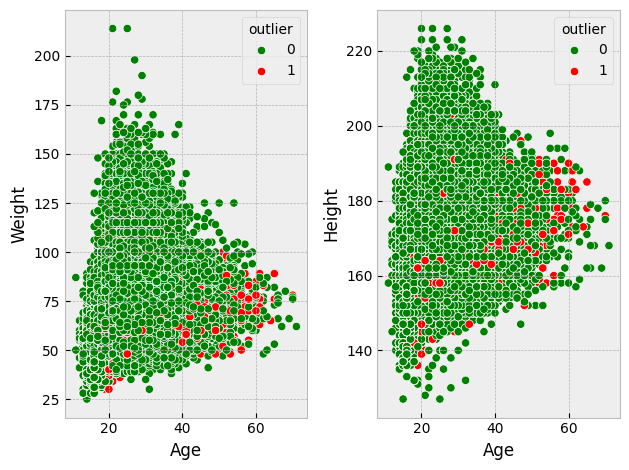

In [31]:
plt.figure()
plt.subplot(1, 2, 1)
sns.scatterplot(x="Age", y="Weight", data=df_n,
                hue="outlier", palette=["green", "red"])
plt.subplot(1, 2, 2)
sns.scatterplot(x="Age", y="Height", data=df_n,
                hue="outlier", palette=["green", "red"])
plt.tight_layout()

#### Eliminación de outliers

Se decide eliminar los outliers multivariados calculados en la etapa anterior. Se eliminan los datos filtrando por la columna *outlier*

In [32]:
# Se filtran solo las filas que contengan "outlier == 0"
df_n = df_n[df_n["outlier"] == 0]
df = df[df["outlier"] == 0]

# Se elimina la columna "outlier"
df_n.drop(columns="outlier", inplace=True)
df.drop(columns="outlier", inplace=True)

# Se resetean los indices
df_n.reset_index(inplace=True, drop=True)
df.reset_index(inplace=True, drop=True)

### 5.5. Dataframe resultante

El dataframe resultante del proceso de limpieza se muestra a continuación.

In [33]:
df_n.head()

,ID,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,Previous_participations,Previous_Gold,Previous_Silver,Previous_Bronze,Previous_No_Medal
0,1,1,24.0,180.0,80.0,99,39,1992,2,4,61,2,0,0.0,0.0,0.0,0.0
1,2,1,23.0,170.0,60.0,99,39,2012,4,17,178,2,0,0.0,0.0,0.0,0.0
2,12,1,31.0,172.0,70.0,166,65,2000,13,2,56,2,0,0.0,0.0,0.0,0.0
3,13,0,30.0,159.0,55.5,166,65,1996,1,22,238,2,0,0.0,0.0,0.0,0.0
4,13,0,34.0,159.0,55.5,166,65,2000,13,22,238,2,1,0.0,0.0,0.0,1.0


In [34]:
df_n.sample(5)

,ID,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,Previous_participations,Previous_Gold,Previous_Silver,Previous_Bronze,Previous_No_Medal
82324,70652,1,23.0,192.0,85.0,99,39,1996,1,20,201,2,0,0.0,0.0,0.0,0.0
30848,26188,1,24.0,178.0,80.0,15,5,1992,2,17,183,2,0,0.0,0.0,0.0,0.0
74801,64164,0,31.0,156.0,52.0,515,67,1988,12,0,3,2,1,0.0,0.0,0.0,1.0
27780,23558,1,26.0,190.0,79.0,191,71,2000,13,29,319,2,0,0.0,0.0,0.0,0.0
5163,4242,1,30.0,186.0,72.0,366,157,1972,9,11,149,2,3,0.0,0.0,0.0,2.0


In [35]:
df_n.tail()

,ID,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,Previous_participations,Previous_Gold,Previous_Silver,Previous_Bronze,Previous_No_Medal
159350,135565,1,27.0,168.0,76.0,19,7,2004,0,16,176,2,1,0.0,0.0,0.0,1.0
159351,135566,1,21.0,175.0,75.0,497,209,1972,9,12,156,2,0,0.0,0.0,0.0,0.0
159352,135567,1,24.0,183.0,72.0,391,166,2000,13,20,204,2,0,0.0,0.0,0.0,0.0
159353,135567,1,28.0,183.0,72.0,391,166,2004,0,20,204,2,1,0.0,0.0,0.0,1.0
159354,135568,0,33.0,171.0,69.0,46,24,2016,10,4,62,2,0,0.0,0.0,0.0,0.0


#### Descripción de los datos posterior a la limpieza y transformación

In [36]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159355 entries, 0 to 159354
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       159355 non-null  int64  
 1   Sex                      159355 non-null  int32  
 2   Age                      159355 non-null  float64
 3   Height                   159355 non-null  float64
 4   Weight                   159355 non-null  float64
 5   Team                     159355 non-null  int32  
 6   NOC                      159355 non-null  int32  
 7   Year                     159355 non-null  int64  
 8   City                     159355 non-null  int32  
 9   Sport                    159355 non-null  int32  
 10  Event                    159355 non-null  int32  
 11  Medal                    159355 non-null  int32  
 12  Previous_participations  159355 non-null  int64  
 13  Previous_Gold            159355 non-null  float64
 14  Prev

In [37]:
df_n.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,159355.0,68001.729146,39213.414888,1.0,34066.0,68438.0,101748.5,135568.0
Sex,159355.0,0.669148,0.470522,0.0,0.0,1.0,1.0,1.0
Age,159355.0,24.871538,5.597207,11.0,21.0,24.0,28.0,71.0
Height,159355.0,175.811722,10.901682,127.0,168.0,176.0,183.0,226.0
Weight,159355.0,70.902749,14.830367,25.0,60.0,70.0,79.0,214.0
Team,159355.0,263.568485,154.251314,0.0,134.0,234.0,417.0,534.0
NOC,159355.0,104.649556,63.476523,0.0,57.0,94.0,160.0,222.0
Year,159355.0,1991.535904,16.721354,1960.0,1976.0,1992.0,2004.0,2016.0
City,159355.0,6.594610,4.456742,0.0,3.0,6.0,10.0,14.0
Sport,159355.0,14.821794,10.414448,0.0,6.0,14.0,24.0,35.0


## 6. Analisis exploratorio de datos<a class="anchor" id="analisis-datos"></a>

###  6.1. Análisis univariado

Se estudia el resultado de medalla olímpica en contraste con otras variables del dataset una a una. En este caso se seleccionaran:

* NOC
* Sex

#### Analisis *Medal* vs *NOC*

Se observa claramente del gráfico que el número de medallas está fuertemente concentrado en los primeros 3 o 4 puestos. Por lo tanto, es esperable que el comité olimpico al que pertenece el competidor tenga una alta correlación con el resultado de medalla olímpica.

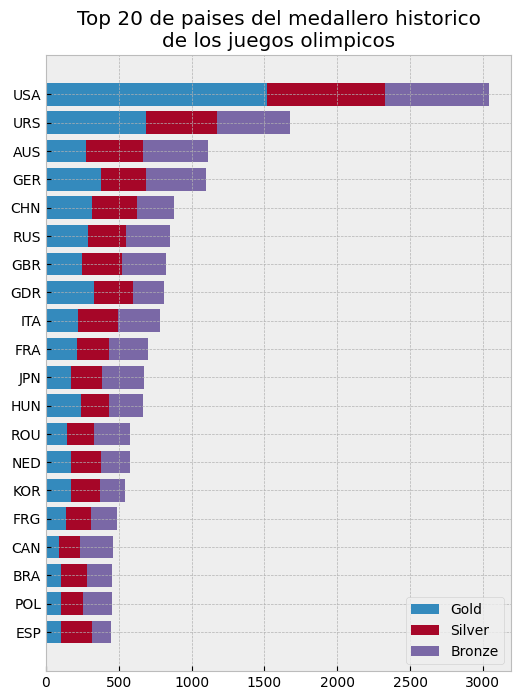

In [38]:
medals_by_noc_and_medal = df[df.Medal.notnull()] \
    .groupby(["NOC", "Medal"]) \
    .count()

medals = pd.DataFrame()
medals["Gold"] = medals_by_noc_and_medal.xs("Gold", level=1)["Event"]
medals["Silver"] = medals_by_noc_and_medal.xs("Silver", level=1)["Event"]
medals["Bronze"] = medals_by_noc_and_medal.xs("Bronze", level=1)["Event"]

medals.fillna(0, inplace=True)

medals = medals.astype(dtype=np.int64)

medals["Total"] = medals["Gold"] + medals["Silver"] + medals["Bronze"]

# Obtener el top 20 de paises con mas medallas
medals = medals.sort_values("Total", ascending=False)
top_twenty = medals[:20]

fig, ax = plt.subplots(figsize=(6, 8))
ax.set_title("Top 20 de paises del medallero historico\nde los juegos olimpicos")
ax.barh(top_twenty.index, top_twenty["Gold"], label="Gold")
ax.barh(top_twenty.index, top_twenty["Silver"], label="Silver", left=top_twenty["Gold"])
ax.barh(top_twenty.index, top_twenty["Bronze"], label="Bronze", left=top_twenty["Gold"]+top_twenty["Silver"])
ax.invert_yaxis()
ax.legend()


#### Analisis *Medal* vs *Sex*

Se observa que el número de medallas obtenidas por deportistas masculinos es aproximadamente el doble del numero de medallas obtenidas por deportistas femeninos. Esto se confirma al graficar los resultados en formato *pie chart* agrupados por *Sex* y *Medal*. Por lo tanto, también es esperable que la variable *Sex* tenga una alta correlación con el resultado obtenido.

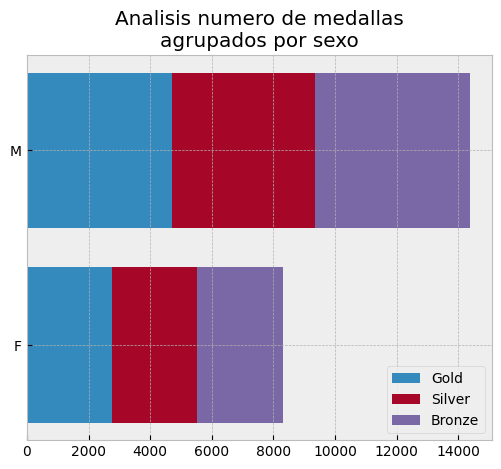

In [39]:
medals_by_sex_and_medal = df[df.Medal.notnull()] \
    .groupby(["Sex", "Medal"]) \
    .count()

medals = pd.DataFrame()
medals["Gold"] = medals_by_sex_and_medal.xs("Gold", level=1)["Event"]
medals["Silver"] = medals_by_sex_and_medal.xs("Silver", level=1)["Event"]
medals["Bronze"] = medals_by_sex_and_medal.xs("Bronze", level=1)["Event"]

medals.fillna(0, inplace=True)

medals = medals.astype(dtype=np.int64)

fig, ax = plt.subplots(figsize=(6, 5))
ax.set_title("Analisis numero de medallas\nagrupados por sexo")
ax.barh(medals.index, medals["Gold"], label="Gold")
ax.barh(medals.index, medals["Silver"], label="Silver", left=medals["Gold"])
ax.barh(medals.index, medals["Bronze"], label="Bronze", left=medals["Gold"]+medals["Silver"])
ax.legend()

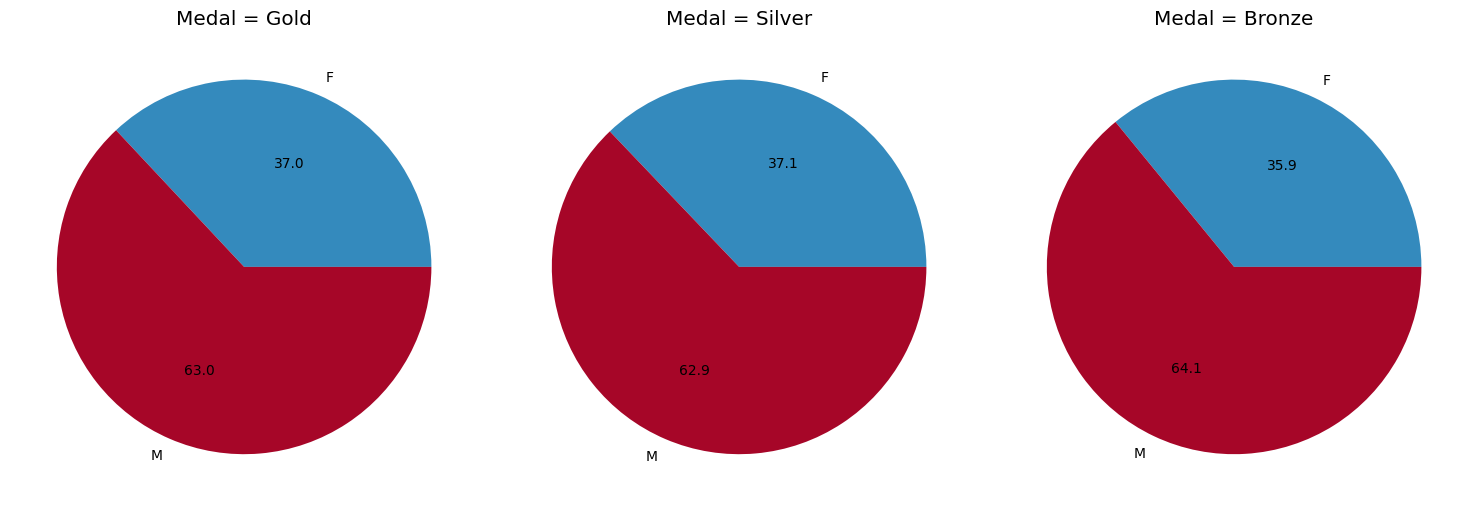

In [40]:
# Se grafican los resultados en formato pie chart
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

cols = medals.columns
for i, ax in enumerate(axs):
    ax.pie(medals.iloc[:, i], labels=medals.index, autopct="%1.1f")
    ax.set_title(f"Medal = {cols[i]}")

plt.tight_layout()

### 6.2. Análisis multivariado

#### Variables numéricas: Age, Height y Weight

Se realiza un gráfico tipo `heatmap` que muestra la matriz de correlación entre estas variables, como se muestra a continuación. Se puede observar que las dimensiones *Height* y *Weight* tienen una alta correlación entre ellas y esto puede significar que no son variables independientes. Esto se confirma al observar los gráficos de dispersión que se muestran más adelante para agrupados por *Sex* y para dos *Sport*, *Athletics* y *Basketball*.

Por otro lado, se muestra la matriz de covarianza, donde los factores de covarianza para *Height* y *Weight* muestran una fuerte tendencia lineal positiva, lo que confirma lo observado en la matriz de correlación y los gráficos.

Se sugiere resumir ambas variables en una llamada *bmi* que corresponde al índice de masa corporal, calculado como:

$$BMI = \frac{W}{H^{2}}$$

Donde W corresponde a la variable *Weight* medida en [kg] y H correspode a la variable *Height* medida en [m].

In [41]:
df_n.head()

,ID,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,Previous_participations,Previous_Gold,Previous_Silver,Previous_Bronze,Previous_No_Medal
0,1,1,24.0,180.0,80.0,99,39,1992,2,4,61,2,0,0.0,0.0,0.0,0.0
1,2,1,23.0,170.0,60.0,99,39,2012,4,17,178,2,0,0.0,0.0,0.0,0.0
2,12,1,31.0,172.0,70.0,166,65,2000,13,2,56,2,0,0.0,0.0,0.0,0.0
3,13,0,30.0,159.0,55.5,166,65,1996,1,22,238,2,0,0.0,0.0,0.0,0.0
4,13,0,34.0,159.0,55.5,166,65,2000,13,22,238,2,1,0.0,0.0,0.0,1.0


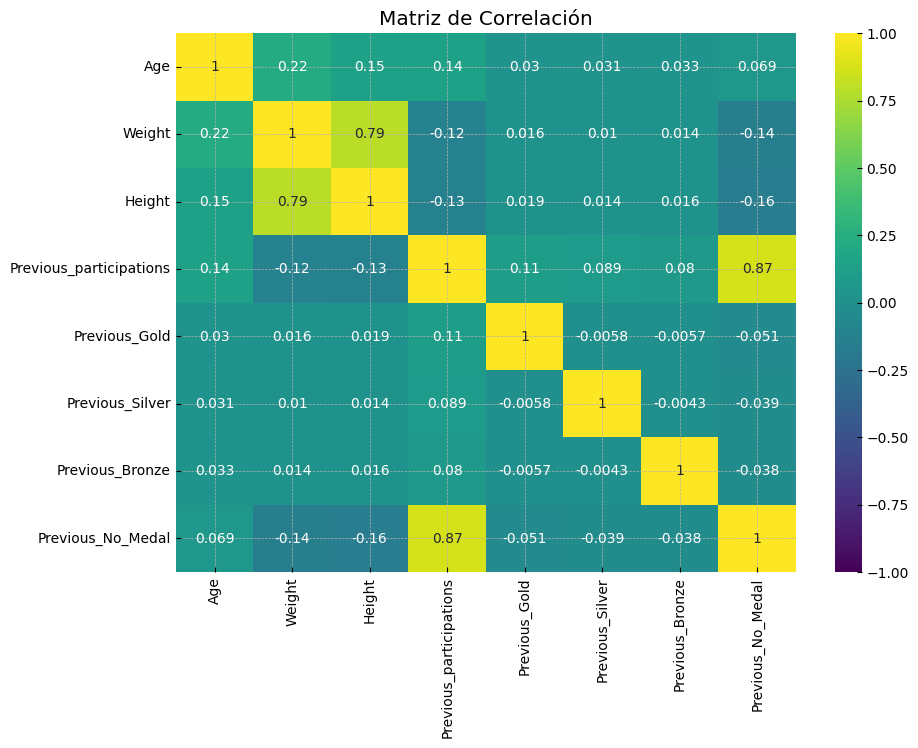

In [42]:
plt.figure(figsize=(10, 7))
correlation_matrix = df_n[["Age", "Weight", "Height", "Previous_participations",
                           "Previous_Gold", "Previous_Silver", "Previous_Bronze",
                           "Previous_No_Medal"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

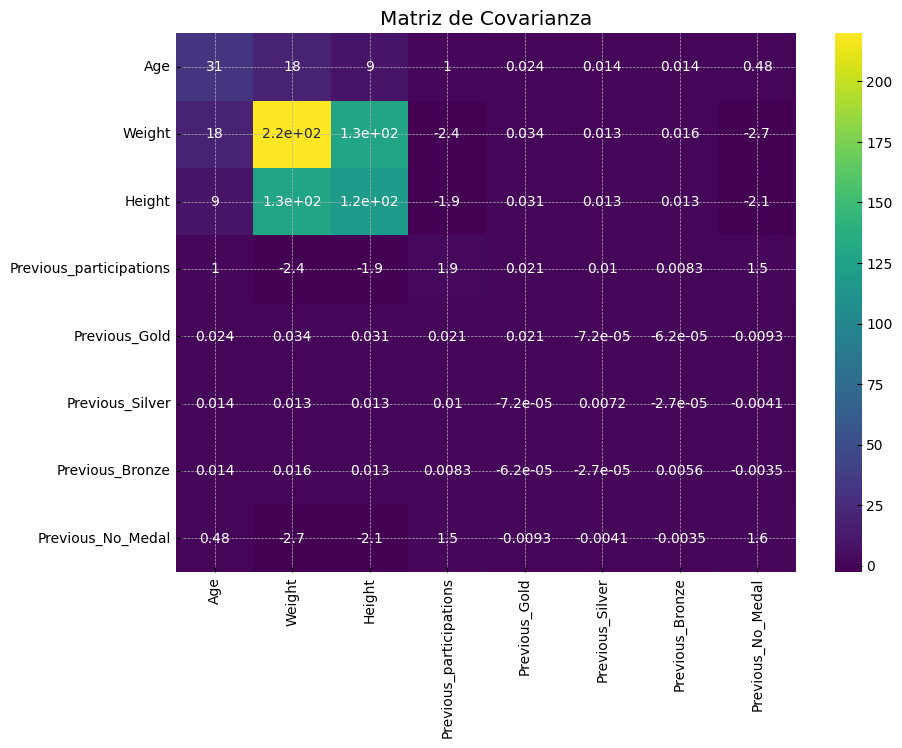

In [43]:
# Se calcula la matriz de covarianza
plt.figure(figsize=(10, 7))
cov_matrix = df_n[["Age", "Weight", "Height", "Previous_participations",
                   "Previous_Gold", "Previous_Silver", "Previous_Bronze",
                   "Previous_No_Medal"]].cov()
sns.heatmap(cov_matrix, annot=True, cmap="viridis")
plt.title('Matriz de Covarianza')
plt.show()

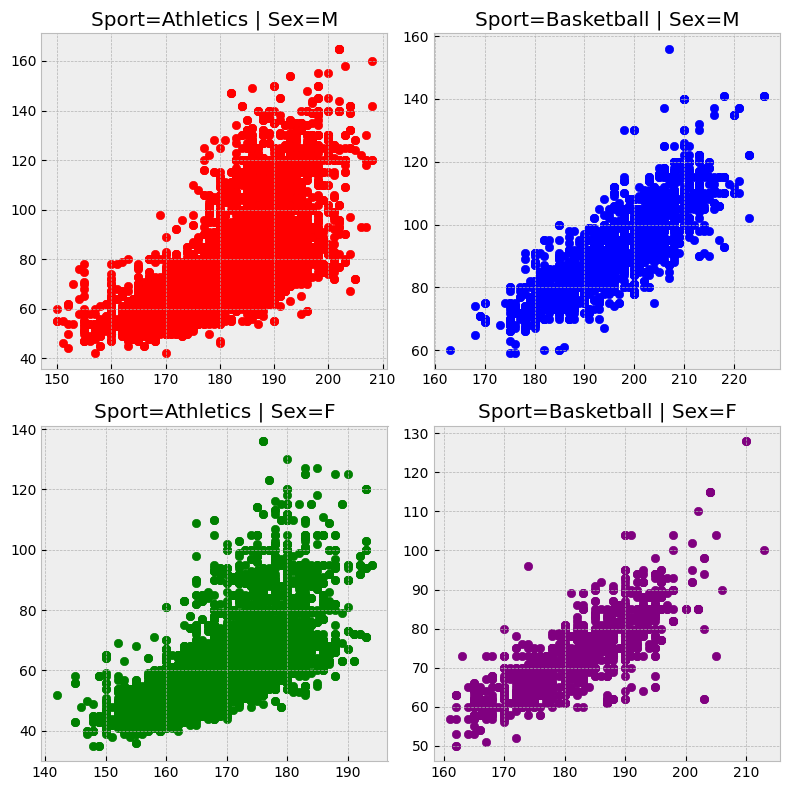

In [44]:
# Se generan graficos de dispersión Height vs Weight, agrupados para Sexo
# y para Sport=Athletics y Sport=Basketball
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(8, 8))

df_athletics = df[df["Sport"] == "Athletics"]
df_basketball = df[df["Sport"] == "Basketball"]

axs[0, 0].scatter(x=df_athletics[df_athletics["Sex"] == "M"]["Height"],
                  y=df_athletics[df_athletics["Sex"] == "M"]["Weight"], c="red")
axs[0, 0].set_title("Sport=Athletics | Sex=M")

axs[0, 1].scatter(x=df_basketball[df_basketball["Sex"] == "M"]["Height"],
                  y=df_basketball[df_basketball["Sex"] == "M"]["Weight"], c="blue")
axs[0, 1].set_title("Sport=Basketball | Sex=M")

axs[1, 0].scatter(x=df_athletics[df_athletics["Sex"] == "F"]["Height"],
                  y=df_athletics[df_athletics["Sex"] == "F"]["Weight"], c="green")
axs[1, 0].set_title("Sport=Athletics | Sex=F")

axs[1, 1].scatter(x=df_basketball[df_basketball["Sex"] == "F"]["Height"],
                  y=df_basketball[df_basketball["Sex"] == "F"]["Weight"], c="purple")
axs[1, 1].set_title("Sport=Basketball | Sex=F")

plt.tight_layout()

#### Variables categóricas: Team y NOC

Estas variables categóricas han de estar altamente correlacionadas. Cada comite olímpico o *NOC* tiene típicamente un equipo olímpico *Team* salvo en algunos casos. Se propone como hipótesis que las variables *Team* y *NOC* son dependientes. Para probar esta hipótesis se debe aplicar el test de chi-cuadrado de Pearson ($\chi^2$). El test consiste en los siguientes pasos:

* Se considera la hipotesis nula ($H_0$) que establece que *NOC* y *Team* son independientes
* Se crea la matriz de contingencia entre *NOC* y *Team*
* Se calcula el parámetro estadístico $\chi^2$ utilizando la librería de scipy
* Si el p-valor es menor a 0.05 se rechaza la hipótesis nula, sino no es posible rechazarla

De acuerdo con el cálculo mostrado en la celda siguiente, se observa que el p-valor es mucho menor que 0.05, por lo tanto, se rechaza la hipótesis nula y se determina que las variables *Team* y *NOC* son dependientes. Finalmente, se propone eliminar la variable *Team* del dataset para reducir la dimensionalidad del modelo.

In [45]:
from scipy.stats import chi2_contingency

# Se crea la matrix de contingencia
contingency_table = pd.crosstab(df["NOC"], df["Team"])
stat, p, dof, expected = chi2_contingency(contingency_table)
print(f"Valor chi-cuadrado: {stat:.2f}")
print(f"p-valor: {p:.4f}")
print(f"Grados de libertad: {dof}")

Valor chi-cuadrado: 35376810.00
p-valor: 0.0000
Grados de libertad: 117660


#### Variables categóricas: Sport y Event

Estas variables categóricas han de estar altamente correlacionadas. En cada *Sport* se ejecutan diversos *Event*, estos events dependen del *Sport* considerado y no se presentan en otros. Por ejemplo, no es posible encontrar un Evento de atletismo como los 100 metros planos en el deporte de Basketball. Se propone como hipótesis que las variables *Sport* y *Event* son dependientes. Para probar esta hipótesis se debe aplicar el test de chi-cuadrado de Pearson ($\chi^2$). El test consiste en los siguientes pasos:

* Se considera la hipotesis nula ($H_0$) que establece que *Sport* y *Event* son independientes
* Se crea la matriz de contingencia entre *Sport* y *Event*
* Se calcula el parámetro estadístico $\chi^2$ utilizando la librería de scipy
* Si el p-valor es menor a 0.05 se rechaza la hipótesis nula, sino no es posible rechazarla

De acuerdo con el cálculo mostrado en la celda siguiente, se observa que el p-valor es mucho menor que 0.05, por lo tanto, se rechaza la hipótesis nula y se determina que las variables *Sport* y *Event* son dependientes. Finalmente, se propone eliminar la variable *Event* del dataset para reducir la dimensionalidad del modelo.

In [46]:
from scipy.stats import chi2_contingency

# Se crea la matrix de contingencia
contingency_table = pd.crosstab(df["Sport"], df["Event"])
stat, p, dof, expected = chi2_contingency(contingency_table)
print(f"Valor chi-cuadrado: {stat:.2f}")
print(f"p-valor: {p:.4f}")
print(f"Grados de libertad: {dof}")

Valor chi-cuadrado: 5577425.00
p-valor: 0.0000
Grados de libertad: 13090


#### Reducción de dimensionalidad

Se eliminan las columnas *Event* y *Team*, y se agrega la columna *bmi*, eliminando las columnas *Height* y *Weight*, como consecuencia del análisis multivariado.

In [47]:
# Se eliminan columnas Team y Event
df_n.drop(columns=["Team", "Event"], inplace=True)

# Se agrega la columna bmi con el valor del indice de masa corporal
# Se divide Height por 100 para transformar en metros
df_n["bmi"] = df_n["Weight"]/((df_n["Height"]/100)**2)

# Se eliminan las columnas Weight y Height
df_n.drop(columns=["Weight", "Height"], inplace=True)

# Se resetean los indices
df_n.reset_index(inplace=True, drop=True)

In [48]:
df_n.head()

,ID,Sex,Age,NOC,Year,City,Sport,Medal,Previous_participations,Previous_Gold,Previous_Silver,Previous_Bronze,Previous_No_Medal,bmi
0,1,1,24.0,39,1992,2,4,2,0,0.0,0.0,0.0,0.0,24.691358
1,2,1,23.0,39,2012,4,17,2,0,0.0,0.0,0.0,0.0,20.761246
2,12,1,31.0,65,2000,13,2,2,0,0.0,0.0,0.0,0.0,23.661439
3,13,0,30.0,65,1996,1,22,2,0,0.0,0.0,0.0,0.0,21.953246
4,13,0,34.0,65,2000,13,22,2,1,0.0,0.0,0.0,1.0,21.953246


## 7. Modelo de predicción

### 7.1. Normalización del Dataframe

Para utilizar el modelo KNN se deben normalizar los datos. Ésto se debe a que el modelo debe calcular la medida euclideana y esto resulta impreciso de realizar cuando los datos no están normalizados.

In [49]:
# Se calcula una versión normalizada de los datos
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Se realiza una copia de los datos para normalizar
df_norm = df_n.copy(deep=True)

# Se normalizan datos con MinMaxScaler
df_norm[["Year", "Previous_participations", "Previous_Gold",
         "Previous_Silver", "Previous_Bronze", "Previous_No_Medal"]] \
    = MinMaxScaler().fit_transform(df_norm[["Year", "Previous_participations", "Previous_Gold",
                                            "Previous_Silver", "Previous_Bronze", "Previous_No_Medal"]])

# Se normalizan datos con StandardScaler
df_norm[["Age", "bmi"]] = StandardScaler()\
    .fit_transform(df_norm[["Age", "bmi"]])

In [50]:
df_norm.head()

,ID,Sex,Age,NOC,Year,City,Sport,Medal,Previous_participations,Previous_Gold,Previous_Silver,Previous_Bronze,Previous_No_Medal,bmi
0,1,1,-0.155710,39,0.571429,2,4,2,0.000000,0.0,0.0,0.0,0.000000,0.649914
1,2,1,-0.334371,39,0.928571,4,17,2,0.000000,0.0,0.0,0.0,0.000000,-0.651145
2,12,1,1.094918,65,0.714286,13,2,2,0.000000,0.0,0.0,0.0,0.000000,0.308961
3,13,0,0.916257,65,0.642857,1,22,2,0.000000,0.0,0.0,0.0,0.000000,-0.256535
4,13,0,1.630901,65,0.714286,13,22,2,0.166667,0.0,0.0,0.0,0.166667,-0.256535


### 7.2. Aplicación del modelo (1era iteración)

Se realiza una primera corrida del modelo con los datos en su forma actual tal y como han sido modificados. Se pueden hacer las siguientes observaciones:

* Se realizó una validación cruzada utilizando la función `cross_val_score()` en donde se encontró que para las 5 iteraciones el modelo tiene un accuracy promedio de **0.90**

* Se realizó un split de los datos utilizando la función `train_test_split()` y luego se analizaron los resultados utilizando la matriz de confusión y el reporte entregado por la función `classification_report()`. Se encontró que el modelo es altamente preciso para la categoría *2 == "No Medal"* con un f1-score de **0.95**. Sin embargo, para las demás categorías el modelo no es tan preciso, obteniendo un f1-score de **0.50**, **0.60** y **0.53** para los targets *Bronze*, *Gold* y *Silver*, respectivamente.

Los resultados obtenidos en esta primera iteración sugieren que en el estado actual del dataset se encuentra sobrerepresentada la categoría *No Medal*, es decir, las categorías se encuentran desbalanceadas.

#### Aplicación del modelo

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split

# Seleccion de caracteristicas
columns = ["Sex", "NOC", "Year", "City", "Sport",
           "Previous_participations", "Previous_Gold", "Previous_Silver",
           "Previous_Bronze", "Previous_No_Medal"]

target = "Medal"

X = df_norm[columns]
y = df_norm[target]

# Se crea clasificador y cross validator
clf = KNeighborsClassifier()
kfolds = StratifiedKFold(n_splits=5)

#### Validación cruzada

In [52]:
scores = cross_val_score(clf, X, y, cv=kfolds)

print("Puntaje de Validación Cruzada: ", scores)
print("Promedio: ", scores.mean())
print("Numero de Corridas de Validación: ", len(scores))

Puntaje de Validación Cruzada:  [0.90508613 0.90373694 0.89840294 0.90452135 0.90103856]
Promedio:  0.9025571836465753
Numero de Corridas de Validación:  5


#### Entrenamiento del modelo

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

#### Validación del modelo

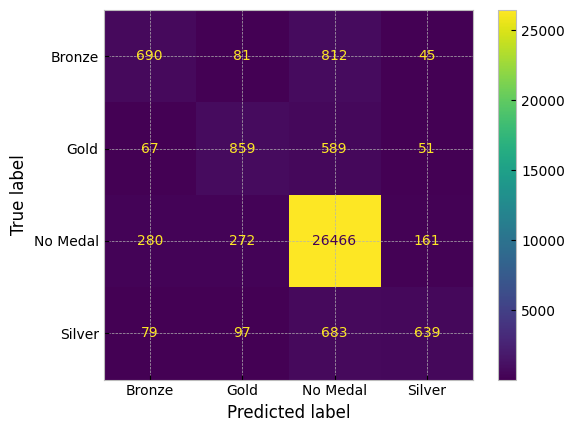

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_test, y_pred)

labels = label_encoders["Medal"].inverse_transform(df_n.Medal.unique())

disp = ConfusionMatrixDisplay(conf_mat, display_labels=["Bronze", "Gold", "No Medal", "Silver"])
disp.plot()


In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.42      0.50      1628
           1       0.66      0.55      0.60      1566
           2       0.93      0.97      0.95     27179
           3       0.71      0.43      0.53      1498

    accuracy                           0.90     31871
   macro avg       0.73      0.59      0.65     31871
weighted avg       0.89      0.90      0.89     31871



### 7.3. Aplicación del modelo (2da iteración)

#### Balanceo del dataset utilizando reducción de cardinalidad

Se reducirá la cantidad de los datos que se encuentren en la categoría *No Medal* de forma aleatoria, de forma de tener una cantidad similar de datos en todas las categorías.

In [56]:
# Calcular cantidad de instancias en todas las categorias
print(f"Medallas de Oro (Gold): {df[df["Medal"] == "Gold"]["Medal"].count()}")
print(f"Medallas de Plata (Silver): {df[df["Medal"] == "Silver"]["Medal"].count()}")
print(f"Medallas de Bronce (Bronze): {df[df["Medal"] == "Bronze"]["Medal"].count()}")
print(f"Sin Medalla (No Medal): {df[df["Medal"] == "No Medal"]["Medal"].count()}")


Medallas de Oro (Gold): 7466
Medallas de Plata (Silver): 7396
Medallas de Bronce (Bronze): 7824
Sin Medalla (No Medal): 136669


In [57]:
# shape antes de la eliminación de datos
df_norm.shape

(159355, 14)

In [58]:
drop_n = 125000
df_no_medal = df[df["Medal"] == "No Medal"]
indices = np.random.choice(df_no_medal.index, drop_n, replace=False)

df_norm.drop(index=indices, inplace=True)

In [59]:
# shape despues de la eliminación de datos
df_norm.shape

(34355, 14)

#### Aplicación del modelo

In [60]:
# Seleccion de caracteristicas
columns = ["Sex", "NOC", "Year", "City", "Sport",
           "Previous_participations", "Previous_Gold", "Previous_Silver",
           "Previous_Bronze", "Previous_No_Medal"]

target = "Medal"

X = df_norm[columns]
y = df_norm[target]

# Se crea clasificador y cross validator
clf = KNeighborsClassifier()
kfolds = StratifiedKFold(n_splits=5)

#### Validación cruzada

In [61]:
scores = cross_val_score(clf, X, y, cv=kfolds)

print("Puntaje de Validación Cruzada: ", scores)
print("Promedio: ", scores.mean())
print("Numero de Corridas de Validación: ", len(scores))

Puntaje de Validación Cruzada:  [0.63818949 0.62509096 0.60602532 0.62159802 0.61868724]
Promedio:  0.6219182069567749
Numero de Corridas de Validación:  5


#### Entrenamiento del modelo

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

#### Validación del modelo

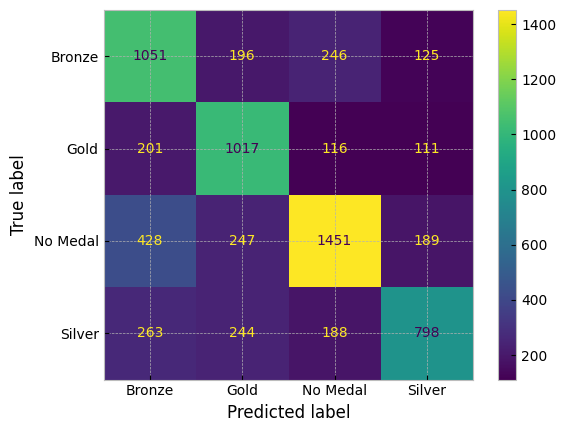

In [63]:
conf_mat = confusion_matrix(y_test, y_pred)

labels = label_encoders["Medal"].inverse_transform(df_n.Medal.unique())

disp = ConfusionMatrixDisplay(conf_mat, display_labels=["Bronze", "Gold", "No Medal", "Silver"])
disp.plot()

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.65      0.59      1618
           1       0.60      0.70      0.65      1445
           2       0.73      0.63      0.67      2315
           3       0.65      0.53      0.59      1493

    accuracy                           0.63      6871
   macro avg       0.63      0.63      0.62      6871
weighted avg       0.64      0.63      0.63      6871



## 7. Conclusiones

En el presente notebook, que corresponde a las Parte II del proyecto final del curso de Data Science I de Coderhouse, se ha realizado la limpieza y transformación de los datos y luego un análisis exploratorio de los mismos. Respecto al trabajo realizado se pueden obtener las siguientes conclusiones.

#### Limpieza y transformación de datos

* Se encontraron dimensiones redundantes o que no aportan información relevante para el resultado de Medalla obtenida. En estos casos se ha optado por eliminar estas dimensiones.

* Se encontró que tanto para las dimensiones *Height* y *Weight* existen un alto porcentaje de datos nulos para años previos a 1960. Por este motivo, se ha decidido realizar el análisis considerando desde el año 1960 en adelante.

* Para los datos nulos se ha optado por la imputación de la mediana de cada dimensión.

* Debido a la alta cantidad de categorías en las dimensiones categóricas se ha optado por utilizar LabelEncoder para la codificación de categorías.

* Debido a la complejidad y multidimensionalidad del dataset se ha utilizado el método Z-Score multivariado para la determinación de los outliers. Finalmente, se ha optado por la eliminación de estos.

#### Analisis exploratorio de datos

* En un análisis univariado de *NOC* se ha encontrado que USA es el comité olimpico con mayor cantidad de medallas olimpicas, superando aproximadamente al segundo lugar por el doble de medallas.

* En el análisis univariado de *Sex* se ha encontrado que los deportistas masculinos han obtenido aproximadamente el 63% de las medallas olímpicas.

* En un análisis multivariado se ha encontrado que las dimensiones *Height* y *Weight* estan altamente correlacionadas entre si. Se ha sugerido que las dimensiones *Height* y *Weight* sean combinadas en una unica dimensión *bmi* que corresponde al indice de masa corporal.

* En un análisis multivariado se ha encontrado que las dimensiones *Team* y *NOC* son depentientes mediante un test de $\chi^2$ de Pearson. Se ha sugerido eliminar la variable *Team* de forma de reducir la dimensionalidad del modelo.

* En un análisis multivariado se ha encontrado que las dimensiones *Sport* y *Event* son depentientes mediante un test de $\chi^2$ de Pearson. Se ha sugerido eliminar la variable *Event* de forma de reducir la dimensionalidad del modelo.
